In [1]:
import numpy as np
import pandas as pd 

In [2]:
df_train = pd.DataFrame(pd.read_excel("bike_train.xlsx"))
df_test = pd.DataFrame(pd.read_excel("bike_test.xlsx"))

In [3]:
df_train['cnt'].describe()

count    11999.000000
mean       158.594966
std        151.392952
min          1.000000
25%         34.000000
50%        118.000000
75%        232.000000
max        957.000000
Name: cnt, dtype: float64

In [4]:
df_train.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.118039,0.777284,0.167195,-0.007446,0.008323,0.007103,0.005295,-0.015359,0.029297,0.042490,-0.013275,-0.029001,0.115768,0.238546,0.229814
season,0.118039,1.000000,-0.446665,0.865268,-0.007610,-0.008928,-0.003688,0.012630,-0.009029,0.410790,0.413196,0.198937,-0.142924,0.119043,0.093595,0.111369
yr,0.777284,-0.446665,1.000000,-0.488103,-0.003948,0.001039,-0.002714,0.001068,-0.006309,-0.198929,-0.190360,-0.141319,0.067356,0.053371,0.171910,0.156960
mnth,0.167195,0.865268,-0.488103,1.000000,-0.007060,0.009372,0.014500,0.006441,-0.012239,0.353330,0.358541,0.201669,-0.147042,0.078563,0.061686,0.073431
hr,-0.007446,-0.007610,-0.003948,-0.007060,1.000000,0.000414,-0.004037,0.003454,-0.024003,0.139251,0.134633,-0.257202,0.130441,0.285182,0.381933,0.396698
holiday,0.008323,-0.008928,0.001039,0.009372,0.000414,1.000000,-0.102503,-0.248601,-0.014707,-0.028519,-0.038005,-0.036672,0.022681,0.022140,-0.044534,-0.030304
weekday,0.007103,-0.003688,-0.002714,0.014500,-0.004037,-0.102503,1.000000,0.031057,0.017259,-0.010002,-0.009841,-0.025932,0.008447,0.023687,0.019179,0.022618
workingday,0.005295,0.012630,0.001068,0.006441,0.003454,-0.248601,0.031057,1.000000,0.042202,0.062273,0.066305,0.022805,-0.002493,-0.298241,0.134789,0.025132
weathersit,-0.015359,-0.009029,-0.006309,-0.012239,-0.024003,-0.014707,0.017259,0.042202,1.000000,-0.080149,-0.081386,0.430378,0.009195,-0.147903,-0.130223,-0.149848
temp,0.029297,0.410790,-0.198929,0.353330,0.139251,-0.028519,-0.010002,0.062273,-0.080149,1.000000,0.991785,-0.019289,-0.013984,0.450777,0.322875,0.395743


Basicamente lo que hice en las anteriores lineas de codigo fue analizar los datos para ver con cuales trabajare

In [43]:
X = df_train[['season','hr','temp','weekday','weathersit','hum','windspeed']]
y = df_train['cnt']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled_train = scaler.fit_transform(X_train)
# X_scaled_test = scaler.fit_transform(X_test)

# y_test = y_test.values.reshape(-1, 1)
# y_train = y_train.values.reshape(-1, 1)
# y_scaled_train = scaler.fit_transform(y_train)
# y_scaled_test = scaler.fit_transform(y_test) 
# y = y.values.reshape(-1, 1)
# y_scaled = scaler.fit_transform(y)

In [50]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=100 ,activation='tanh',input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=50 ,activation='tanh'))
model.add(tf.keras.layers.Dense(units=25 ,activation='tanh'))
model.add(tf.keras.layers.Dense(units=1 ,activation='relu'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               800       
                                                                 
 dense_31 (Dense)            (None, 50)                5050      
                                                                 
 dense_32 (Dense)            (None, 25)                1275      
                                                                 
 dense_33 (Dense)            (None, 1)                 26        
                                                                 
Total params: 7,151
Trainable params: 7,151
Non-trainable params: 0
_________________________________________________________________


In [51]:
from sklearn.metrics import mean_squared_error
metrics = tf.keras.metrics.RootMeanSquaredError()
model.compile(optimizer = "Adam", loss = 'mean_squared_error', metrics = metrics)

epoch_historial = model.fit(X_train ,y_train,epochs = 100,batch_size = 50, use_multiprocessing=True)

#se entrena al modelo, el epochs es basicamente cuantas veces se entrenara el modelo

Epoch 1/100
192/192 [==============================] - 1s 2ms/step - loss: 45483.2773 - root_mean_squared_error: 213.2681
Epoch 2/100
192/192 [==============================] - 0s 2ms/step - loss: 43847.0625 - root_mean_squared_error: 209.3969
Epoch 3/100
192/192 [==============================] - 0s 2ms/step - loss: 42450.8086 - root_mean_squared_error: 206.0359
Epoch 4/100
192/192 [==============================] - 0s 2ms/step - loss: 41134.6719 - root_mean_squared_error: 202.8168
Epoch 5/100
192/192 [==============================] - 0s 2ms/step - loss: 39888.1992 - root_mean_squared_error: 199.7203
Epoch 6/100
192/192 [==============================] - 0s 2ms/step - loss: 38705.0273 - root_mean_squared_error: 196.7359
Epoch 7/100
192/192 [==============================] - 0s 2ms/step - loss: 37581.7656 - root_mean_squared_error: 193.8602
Epoch 8/100
192/192 [==============================] - 0s 2ms/step - loss: 36515.7109 - root_mean_squared_error: 191.0909
Epoch 9/100
192/192 [===

In [52]:
epoch_historial.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

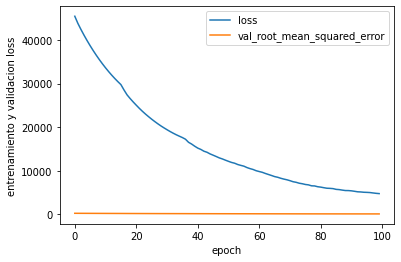

In [53]:
import matplotlib.pyplot as plt
plt.plot(epoch_historial.history['loss'])
plt.plot(epoch_historial.history['root_mean_squared_error'])
# plt.plot(epoch_historial.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('entrenamiento y validacion loss')
plt.legend(['loss','val_root_mean_squared_error','val_loss'])   

In [56]:
y_train_pred = model.predict(X_test)
#predigo con los datos de test (y las dichas columnas que seleccione antes segun su correlacion)
#y le hago un inverse transform asi tengo los datos en el formato que estaban

75/75 [==============================] - 0s 2ms/step


In [ ]:
#y_pred_t = scaler.inverse_transform(y_train_pred)

In [57]:
RMSE = np.sqrt(mean_squared_error(y_test, y_train_pred, squared=False))
RMSE

8.558759952953134

In [58]:
X_datos_test = df_test[['season','hr','temp','weekday','weathersit','hum','windspeed']]
y_datos_pred = model.predict(X_datos_test)

169/169 [==============================] - 0s 994us/step


In [59]:
dataframe = pd.DataFrame(y_datos_pred)
dataframe2 = dataframe.rename(columns={0:'pred'})
dataframe2['pred']=dataframe2['pred'].astype('int64')
dataframe2.to_csv('luqui5.csv',index=False)
#paso a dataframe y guardo a csv los datos para la entregaa